In [7]:
from multiprocessing.reduction import duplicate

# core libraries
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize

# ml
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ridge_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# statistical analyissi
from scipy import stats
import statsmodels.api as sm

# warning
import warnings
warnings.filterwarnings("ignore")

# display setting
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)
plt.style.use('seaborn-v0_8-whitegrid')



## DATA LOADING & INITIAL EXPLORATION

In [8]:
# load california house dataset
california = fetch_california_housing()

# create dataframe
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target # target variable $100,100

print("Dataset Shape :", df.shape)
print(f'Total Sample : {df.shape[0]:,}')
print(f'Total Features : {df.shape[1] - 1}')
print(f'Target variable : MedHouseVal ( Median House Value) ')

Dataset Shape : (20640, 9)
Total Sample : 20,640
Total Features : 8
Target variable : MedHouseVal ( Median House Value) 


In [9]:
#first look at the data
print("10 rows of dataset :")
df.head(10)

10 rows of dataset :


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0000,6.9841,1.0238,322.0000,2.5556,37.8800,-122.2300,4.5260
1,8.3014,21.0000,6.2381,0.9719,2401.0000,2.1098,37.8600,-122.2200,3.5850
2,7.2574,52.0000,8.2881,1.0734,496.0000,2.8023,37.8500,-122.2400,3.5210
3,5.6431,52.0000,5.8174,1.0731,558.0000,2.5479,37.8500,-122.2500,3.4130
4,3.8462,52.0000,6.2819,1.0811,565.0000,2.1815,37.8500,-122.2500,3.4220
5,4.0368,52.0000,4.7617,1.1036,413.0000,2.1399,37.8500,-122.2500,2.6970
6,3.6591,52.0000,4.9319,0.9514,1094.0000,2.1284,37.8400,-122.2500,2.9920
7,3.1200,52.0000,4.7975,1.0618,1157.0000,1.7883,37.8400,-122.2500,2.4140
8,2.0804,42.0000,4.2941,1.1176,1206.0000,2.0269,37.8400,-122.2600,2.2670
9,3.6912,52.0000,4.9706,0.9902,1551.0000,2.1723,37.8400,-122.2500,2.6110


In [10]:
# dtype and memory usasge
print("dtype and memory usage : ")
df.info()

dtype and memory usage : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
# statisrical summary
print("statistical summary : ")
df.describe().T

statistical summary : 


,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0000,3.8707,1.8998,0.4999,2.5634,3.5348,4.7432,15.0001
HouseAge,20640.0000,28.6395,12.5856,1.0000,18.0000,29.0000,37.0000,52.0000
AveRooms,20640.0000,5.4290,2.4742,0.8462,4.4407,5.2291,6.0524,141.9091
AveBedrms,20640.0000,1.0967,0.4739,0.3333,1.0061,1.0488,1.0995,34.0667
Population,20640.0000,1425.4767,1132.4621,3.0000,787.0000,1166.0000,1725.0000,35682.0000
AveOccup,20640.0000,3.0707,10.3860,0.6923,2.4297,2.8181,3.2823,1243.3333
Latitude,20640.0000,35.6319,2.1360,32.5400,33.9300,34.2600,37.7100,41.9500
Longitude,20640.0000,-119.5697,2.0035,-124.3500,-121.8000,-118.4900,-118.0100,-114.3100
MedHouseVal,20640.0000,2.0686,1.1540,0.1500,1.1960,1.7970,2.6472,5.0000


In [15]:
# cgeck for missing values
print("missing values check : ")
missing = df.isnull().sum()
print(missing[missing > 0 ]if missing.sum() > 0 else "noo missing values found!")

missing values check : 
noo missing values found!


In [16]:
# check for duplicate
duplicates = df.duplicated().sum()
print(f"\n Duplicated Rows : {duplicates}")


 Duplicated Rows : 0


# Exploratory Data Analysis (EDA)

## 4.1 Target Variable Distribution

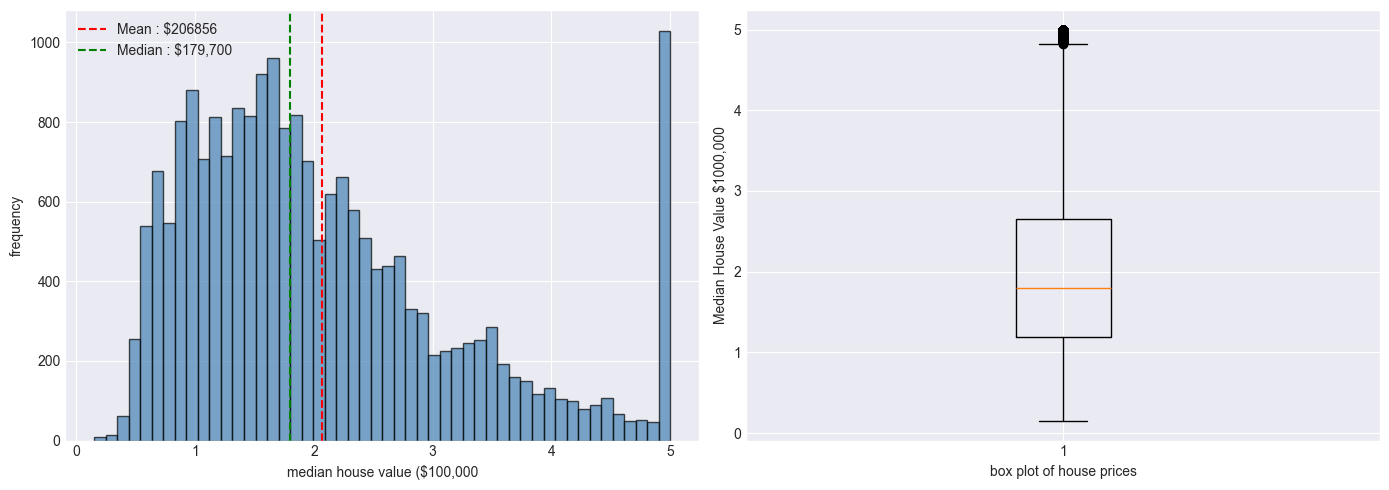

Target variable statistics:
    skewness : 0.9778
    Kurtosis : 0.3279


In [12]:
fig, axes = plt.subplots(1,2, figsize=(14,5))

# histogram
axes[0].hist(df['MedHouseVal'], bins = 50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df['MedHouseVal'].mean(), color='red', linestyle='--', label=f'Mean : ${df["MedHouseVal"].mean()*100000:.0f}')
axes[0].axvline(df['MedHouseVal'].median(), color='green', linestyle='--', label=f'Median : ${df["MedHouseVal"].median()*100000:,.0f}')
axes[0].set_xlabel("median house value ($100,000")
axes[0].set_ylabel("frequency")
axes[0].legend()

# box plot
axes[1].boxplot(df['MedHouseVal'], vert=True)
axes[1].set_ylabel("Median House Value $1000,000")
axes[1].set_xlabel("box plot of house prices")

plt.tight_layout()
plt.show()

# skewness and kurtosis
print("Target variable statistics:")
print(f"    skewness : {df['MedHouseVal'].skew():.4f}")
print(f"    Kurtosis : {df['MedHouseVal'].kurtosis():.4f}")

## 4.2 Feature Distributions

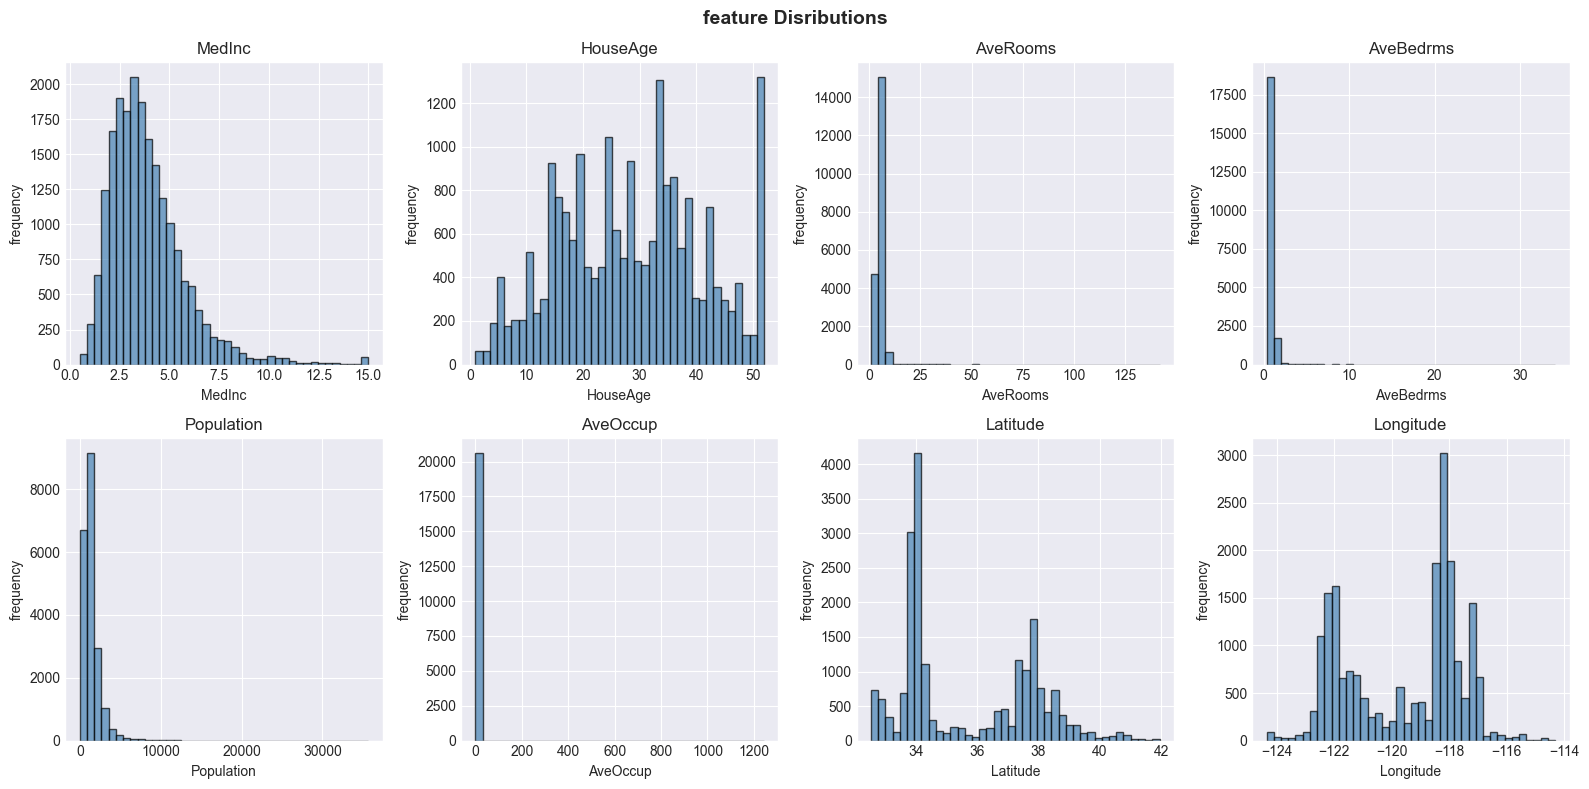

In [13]:
features = california.feature_names
fig, axes = plt.subplots(2,4, figsize=(16,8))
axes = axes.flatten()

for i, col in enumerate(features):
    axes[i].hist(df[col], bins = 40, color='steelblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('frequency')

plt.suptitle('feature Disributions', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 4.3 Corerelation Analysis


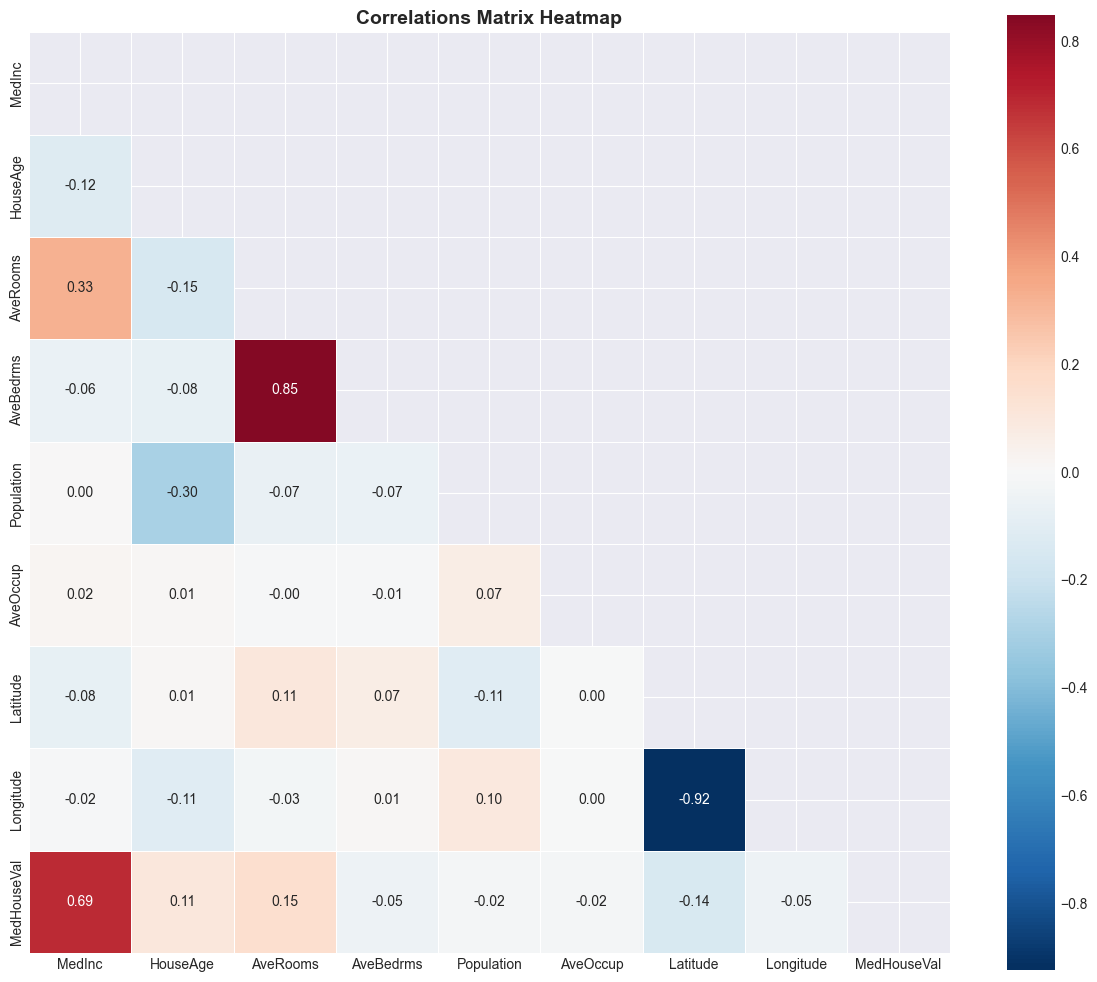

Correlation with target (MedHouseVal)
    MedInc : 0.6881
    AveRooms : 0.1519
    HouseAge : 0.1056
    AveOccup : -0.0237
    Population : -0.0246
    Longitude : -0.0460
    AveBedrms : -0.0467
    Latitude : -0.1442


In [14]:
# correlation matrix
plt.figure(figsize=(12,10))
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, square=True, linewidths=0.5)
plt.title('Correlations Matrix Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# correlation with target
print("Correlation with target (MedHouseVal)")
target_corr = correlation_matrix['MedHouseVal'].drop('MedHouseVal').sort_values(ascending=False)
for feature, corr in target_corr.items():
    print(f"    {feature} : {corr:.4f}")

## Scatter plots vs Target

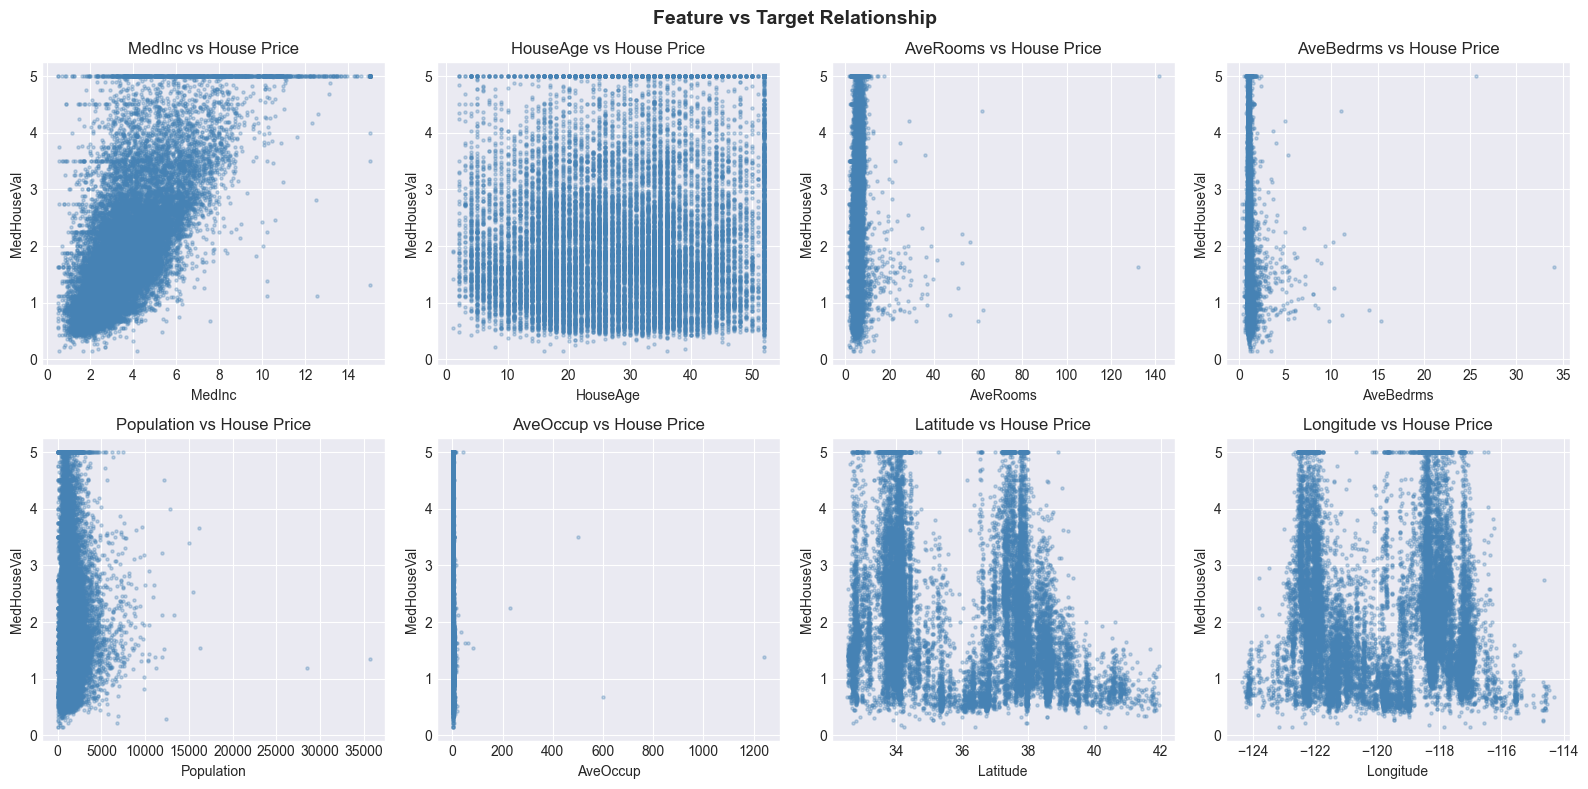

In [15]:
fig , axes = plt.subplots(2,4, figsize=(16,8))
axes = axes.flatten()

for i, col in enumerate(features):
    axes[i].scatter(df[col], df['MedHouseVal'], alpha=0.3, s=5,c='steelblue')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("MedHouseVal")
    axes[i].set_title(f'{col} vs House Price')

plt.suptitle('Feature vs Target Relationship', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 4.5 Geographic analysis

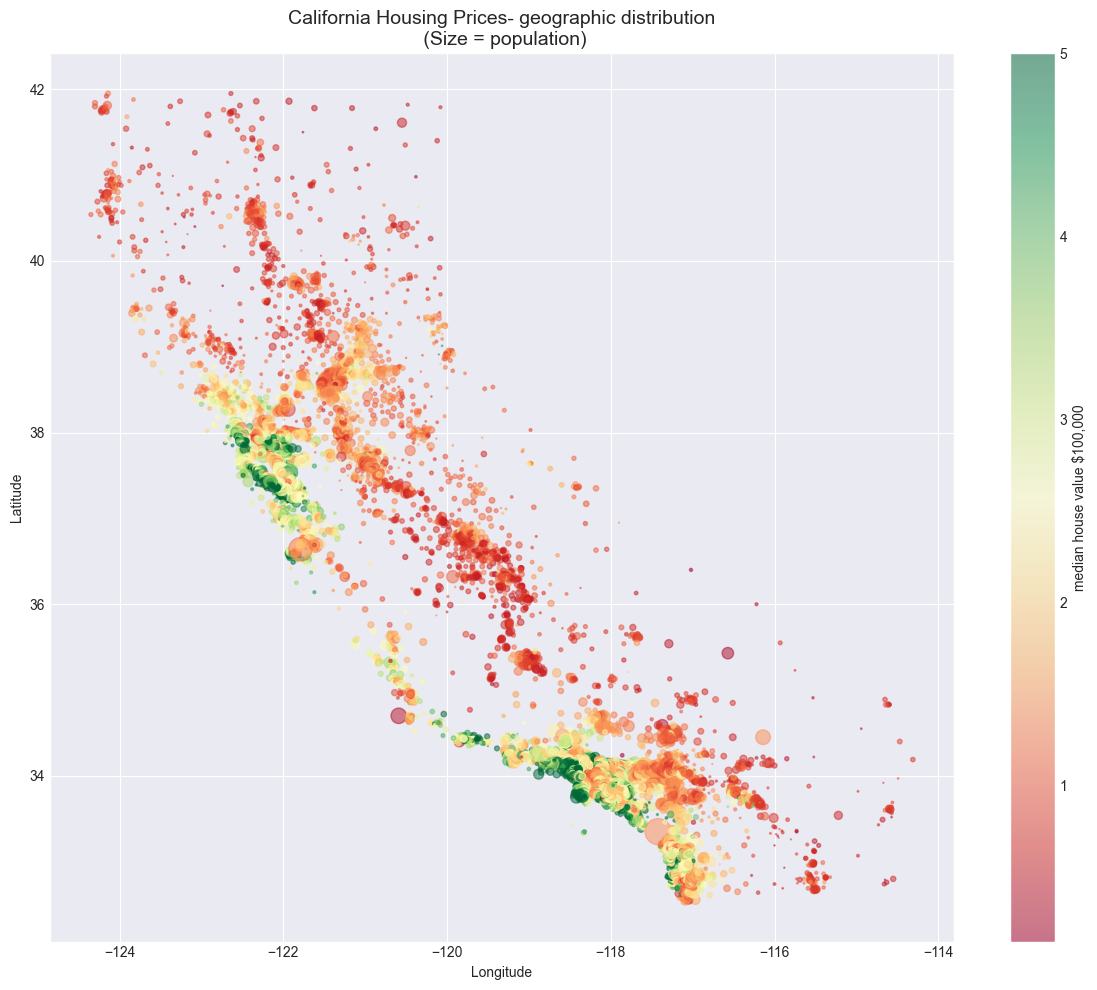

In [16]:
plt.figure(figsize=(12,10))
scatter = plt.scatter(df['Longitude'], df['Latitude'],
                      c=df['MedHouseVal'],cmap='RdYlGn',
                      alpha=0.5, s=df['Population']/100)
plt.colorbar(scatter, label ='median house value $100,000')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Housing Prices- geographic distribution\n (Size = population)', fontsize=14)
plt.tight_layout()
plt.show()

# 5 Data preProcessing & Feature Enggineering

## 5.1 Handling outliers

In [18]:
def detect_outliers_iqr(data,column):
    """Detect outliers using IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound
print("Outlier detection ")
print("-" * 60)
for col in df.columns:
    count, lower, upper = detect_outliers_iqr(df,col)
    percentage = (count / len(df) * 100)
    print(f"{col:15} | outliers: {count:5} ({percentage:.2f}%) | Range: [{lower:.2f}, {upper:.2f}]")

Outlier detection 
------------------------------------------------------------
MedInc          | outliers:   681 (3.30%) | Range: [-0.71, 8.01]
HouseAge        | outliers:     0 (0.00%) | Range: [-10.50, 65.50]
AveRooms        | outliers:   511 (2.48%) | Range: [2.02, 8.47]
AveBedrms       | outliers:  1424 (6.90%) | Range: [0.87, 1.24]
Population      | outliers:  1196 (5.79%) | Range: [-620.00, 3132.00]
AveOccup        | outliers:   711 (3.44%) | Range: [1.15, 4.56]
Latitude        | outliers:     0 (0.00%) | Range: [28.26, 43.38]
Longitude       | outliers:     0 (0.00%) | Range: [-127.48, -112.33]
MedHouseVal     | outliers:  1071 (5.19%) | Range: [-0.98, 4.82]


In [19]:
# create a copy for preporcesing
df_processed = df.copy()

# cap extreme outliers in specific columns
# target variabel capped at 5 ( data limitation in original dataset)
print(f"\n observations with MedHouseval = 5.0 (Capped) : {(df_processed['MedHouseVal'] == 5.0).sum()}")

# remove capped values for better model training
df_processed = df_processed[df_processed['MedHouseVal'] < 5.0]
print(f"After removing capped Values: {len(df_processed):,} obsertvations")



 observations with MedHouseval = 5.0 (Capped) : 27
After removing capped Values: 19,648 obsertvations


## 5.2 Feature engginering

In [20]:
# create new meaningful features
df_processed['RoomPerPerson'] = df_processed['AveRooms'] / df['AveOccup']
df_processed['BedroomRatio'] = df_processed['AveBedrms'] / df_processed['AveRooms']
df_processed['PopulationDensity'] = df_processed['Population'] / (df_processed['AveOccup'] + 1)

print("New Features Created:")
print("   - RoomsPerPerson: Average rooms per person")
print("   - BedroomRatio: Ratio of bedrooms to total rooms")
print("   - PopulationDensity: Population density estimate")

New Features Created:
   - RoomsPerPerson: Average rooms per person
   - BedroomRatio: Ratio of bedrooms to total rooms
   - PopulationDensity: Population density estimate


In [21]:
# handle infinite values from division
df_processed = df_processed.replace([np.inf, -np.inf], np.nan)
df_processed = df_processed.dropna()
print(f"Final dataset size : {len(df_processed):,} observations")

Final dataset size : 19,648 observations


## 5.3 Train test split


In [23]:
# define feature and target
feature_columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
                   'AveOccup', 'Latitude', 'Longitude', 'RoomPerPerson',
                   'BedroomRatio', 'PopulationDensity']

X = df_processed[feature_columns]
y = df_processed['MedHouseVal']

# split data ( 80 train 20 test )
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42
)

print("data split summary : ")
print(f'Training set : {X_train.shape[0]:,} samples ({X_train.shape[0] / len (X) * 100:.1f}%)')
print(f'Test set : {X_test.shape[0]:,} samples ({X_test.shape[0] / len (X) * 100:.1f}%)')
print(f'features : {X_train.shape[1]:,}')

data split summary : 
Training set : 15,718 samples (80.0%)
Test set : 3,930 samples (20.0%)
features : 11


## 5.4 feature scaling


In [24]:
# intial scaler
scaler = StandardScaler()

# fit on training data, transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# convert back to dataframe for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_columns, index=X_test.index)

print("feature scaling applied ( standarscaler")
print('Scaled Training Data Statistic')
print(X_train_scaled.describe().T[['mean', 'std', 'min', 'max']])

feature scaling applied ( standarscaler
Scaled Training Data Statistic
                     mean    std     min      max
MedInc            -0.0000 1.0000 -2.0214   7.1995
HouseAge           0.0000 1.0000 -2.1926   1.8823
AveRooms          -0.0000 1.0000 -1.9022  53.4813
AveBedrms         -0.0000 1.0000 -1.6088  69.4727
Population         0.0000 1.0000 -1.2371  29.3921
AveOccup          -0.0000 1.0000 -0.2051 104.3961
Latitude           0.0000 1.0000 -1.4526   2.9200
Longitude          0.0000 1.0000 -2.3846   2.6281
RoomPerPerson      0.0000 1.0000 -1.6886  46.3847
BedroomRatio       0.0000 1.0000 -2.0124  13.7721
PopulationDensity  0.0000 1.0000 -1.3005  16.4891


### Linear Regression Formula:

$$\hat{y} = X\beta$$

Where:
- $\hat{y}$ = predicted values
- $X$ = feature matrix (with bias term)
- $\beta$ = coefficients (weights)

### Normal Equation (Closed-form Solution):

$$\beta = (X^T X)^{-1} X^T y$$

### Cost Function (MSE):

$$J(\beta) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2$$

In [29]:
class LinearRegressionFromScratch:
    """ Linear Regression from scratch """

    def __init__(self):
        self.coefficients = None
        self.intercept = None

    def fit(self, X , y):
        """
            Fit linear regression using Normal Equation
            β = (X^T X)^(-1) X^T y
        """
        # convert to numpy array
        X = np.array(X)
        y = np.array(y).reshape(-1,1)

        # add bias term ( columns of 1s )
        m = X.shape[0]
        X_b = np.c_[np.ones((m,1)), X]

        # Normal equation
        theta = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y

        # Extracrt intercept and coefficient
        self.intercept = theta[0,0]
        self.coefficients = theta[1:].flatten()

        return self

    def predict(self, X):
        """Make prediction"""
        X = np.array[X]
        return self.intercept + X @ self.coefficients

    def score(self, X, y):
        """ Calcilate R2 score """
        y_pred = self.predict(X)
        ss_res = np.sum((y-y_pred) ** 2)
        ss_tot = np.sum(y - np.mean(y) ** 2)
        return 1 - (ss_res / ss_tot)

# Train custom Model
model_scratch = LinearRegressionFromScratch()
model_scratch.fit(X_train_scaled, y_train)

print("Custom Linear Regression Model Trained!")
print(f'Model Parameters:')
print(f'    Intercept: {model_scratch.intercept:.6f}')
print(f'\n    Coefficients: ')
for name, coef in zip(feature_columns, model_scratch.coefficients):
    print(f'    {name:20}: {coef:.6f}')

Custom Linear Regression Model Trained!
Model Parameters:
    Intercept: 1.920532

    Coefficients: 
    MedInc              : 0.643236
    HouseAge            : 0.120567
    AveRooms            : -0.053609
    AveBedrms           : -0.183305
    Population          : -0.215672
    AveOccup            : 0.000738
    Latitude            : -0.806491
    Longitude           : -0.760509
    RoomPerPerson       : 0.340851
    BedroomRatio        : 0.209243
    PopulationDensity   : 0.259983


## 6.2 Gradient descent implementation

✅ Gradient Descent Model Trained!


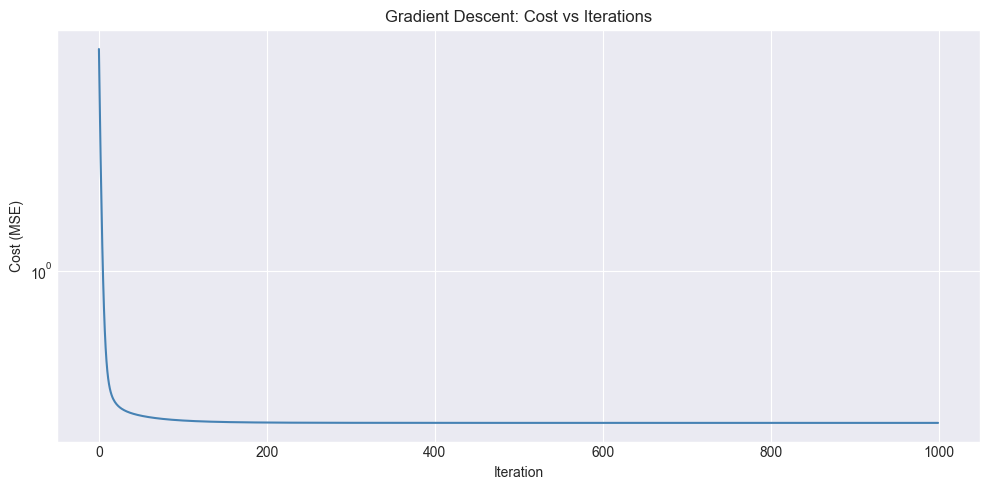

In [28]:
class LinearRegressionGD:
    """Linear Regression using Gradient Descent"""

    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        m, n = X.shape

        # Initialize parameters
        self.weights = np.zeros(n)
        self.bias = 0

        # Gradient Descent
        for i in range(self.n_iterations):
            # Forward pass
            y_pred = X @ self.weights + self.bias

            # Compute cost (MSE)
            cost = np.mean((y_pred - y) ** 2)
            self.cost_history.append(cost)

            # Compute gradients
            dw = (2/m) * X.T @ (y_pred - y)
            db = (2/m) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

        return self

    def predict(self, X):
        return np.array(X) @ self.weights + self.bias

# Train with Gradient Descent
model_gd = LinearRegressionGD(learning_rate=0.1, n_iterations=1000)
model_gd.fit(X_train_scaled, y_train)

print("✅ Gradient Descent Model Trained!")

# Plot cost history
plt.figure(figsize=(10, 5))
plt.plot(model_gd.cost_history, color='steelblue')
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.title('Gradient Descent: Cost vs Iterations')
plt.yscale('log')
plt.tight_layout()
plt.show()

## 7. model building - using scikit-learn

In [30]:
# Train sklearn model
model_sklearn = LinearRegression()
model_sklearn.fit(X_train_scaled, y_train)

print("scikit-learn LR model trained!")
print('model parameters:')
print(f'intercept : {model_sklearn.intercept_:.6f}')
print(f'coeficients :')
for name, coef in zip(feature_columns, model_sklearn.coef_):
    print(f'    {name:20}: {coef:.6f}')

scikit-learn LR model trained!
model parameters:
intercept : 1.920532
coeficients :
    MedInc              : 0.643236
    HouseAge            : 0.120567
    AveRooms            : -0.053609
    AveBedrms           : -0.183305
    Population          : -0.215672
    AveOccup            : 0.000738
    Latitude            : -0.806491
    Longitude           : -0.760509
    RoomPerPerson       : 0.340851
    BedroomRatio        : 0.209243
    PopulationDensity   : 0.259983


In [36]:
# compare implenetation
print("comparsion of implementation:")
print('='*70)
print(f"{'Feature':<20} {'Scratch':<15} {'Sklearn':<15} {'Difference':<15}")
print('='*70)
for i, name in enumerate(feature_columns):
    diff = abs(model_scratch.coefficients[i] - model_sklearn.coef_[i])
    print(f"{name:<20} {model_scratch.coefficients[i]:<15.6f} {model_sklearn.coef_[i]:<15.6f} {diff:<15.2e}")

comparsion of implementation:
Feature              Scratch         Sklearn         Difference     
MedInc               0.643236        0.643236        1.55e-15       
HouseAge             0.120567        0.120567        9.30e-16       
AveRooms             -0.053609       -0.053609       2.64e-15       
AveBedrms            -0.183305       -0.183305       6.66e-16       
Population           -0.215672       -0.215672       6.19e-15       
AveOccup             0.000738        0.000738        3.24e-16       
Latitude             -0.806491       -0.806491       1.67e-15       
Longitude            -0.760509       -0.760509       8.88e-16       
RoomPerPerson        0.340851        0.340851        2.50e-15       
BedroomRatio         0.209243        0.209243        1.36e-15       
PopulationDensity    0.259983        0.259983        6.88e-15       


## 8. model evaluation & metrics

In [37]:
# predictions
y_train_pred = model_sklearn.predict(X_train_scaled)
y_test_pred = model_sklearn.predict(X_test_scaled)

def evaluate_model(y_true, y_pred, dataset_name):
    """Calculate and display evaluation metrics"""

    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(f"\n{dataset_name} Metrics:")
    print(f"    MSE (MEAN SQUARED ERROR): {mse:.6f}")
    print(f"    RMSE (MEAN SQUARED ERROR): {rmse:.6f}")
    print(f"    MAE (MEAN SQUARED ERROR): {mae:.6f}")
    print(f"    R2 (COEFFICIENT OF DET.): {r2:.6f}")
    print(f"    MAPE (MEAN ABS. % ERROR): {mape:.6f}")

    return {'mse': mse , 'rmse': rmse , 'mae': mae , 'r2': r2, 'mape': mape}

train_metrics = evaluate_model(y_train, y_train_pred, "Training set")
test_metrics = evaluate_model(y_test, y_test_pred, "Test set")


Training set Metrics:
    MSE (MEAN SQUARED ERROR): 0.349318
    RMSE (MEAN SQUARED ERROR): 0.591031
    MAE (MEAN SQUARED ERROR): 0.432784
    R2 (COEFFICIENT OF DET.): 0.628018
    MAPE (MEAN ABS. % ERROR): 27.571135

Test set Metrics:
    MSE (MEAN SQUARED ERROR): 0.360911
    RMSE (MEAN SQUARED ERROR): 0.600759
    MAE (MEAN SQUARED ERROR): 0.444739
    R2 (COEFFICIENT OF DET.): 0.623552
    MAPE (MEAN ABS. % ERROR): 28.711325


In [38]:
# cross validation
cv_scores = cross_val_score(model_sklearn, X_train, y_train, cv=5, scoring='r2')
print(f"5-fold cross-validation r2 scores:")
for i , score in enumerate(cv_scores):
    print(f"    Fold {i}: {score:.4f}")
print(f"\n Mean: {cv_scores.mean():.4f} (+- {cv_scores.std()*2:.4f})")

5-fold cross-validation r2 scores:
    Fold 0: 0.6167
    Fold 1: 0.6168
    Fold 2: 0.5537
    Fold 3: 0.6438
    Fold 4: 0.6475

 Mean: 0.6157 (+- 0.0672)


Text(0.5, 1.0, 'Test set: actual vs predicted\nR² = 0.6236')

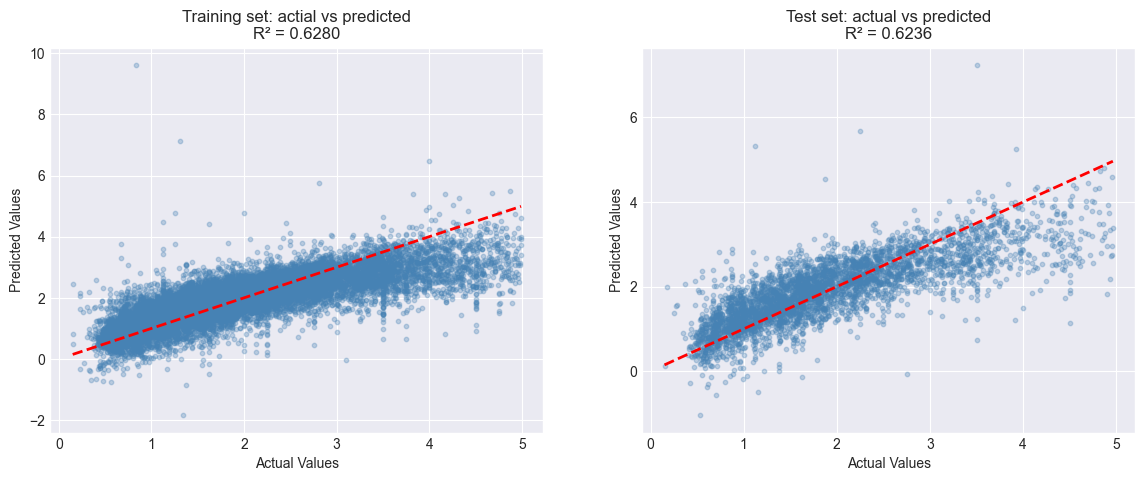

In [42]:
# Actual vs predicted plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# training set
axes[0].scatter(y_train, y_train_pred,  alpha=0.3, s=10, c='steelblue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title(f'Training set: actial vs predicted\nR² = {train_metrics["r2"]:.4f}')

# test set
axes[1].scatter(y_test, y_test_pred, alpha=0.3, s=10, c='steelblue')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')
axes[1].set_title(f'Test set: actual vs predicted\nR² = {test_metrics["r2"]:.4f}')


## 9. residual analysis & assumptions check

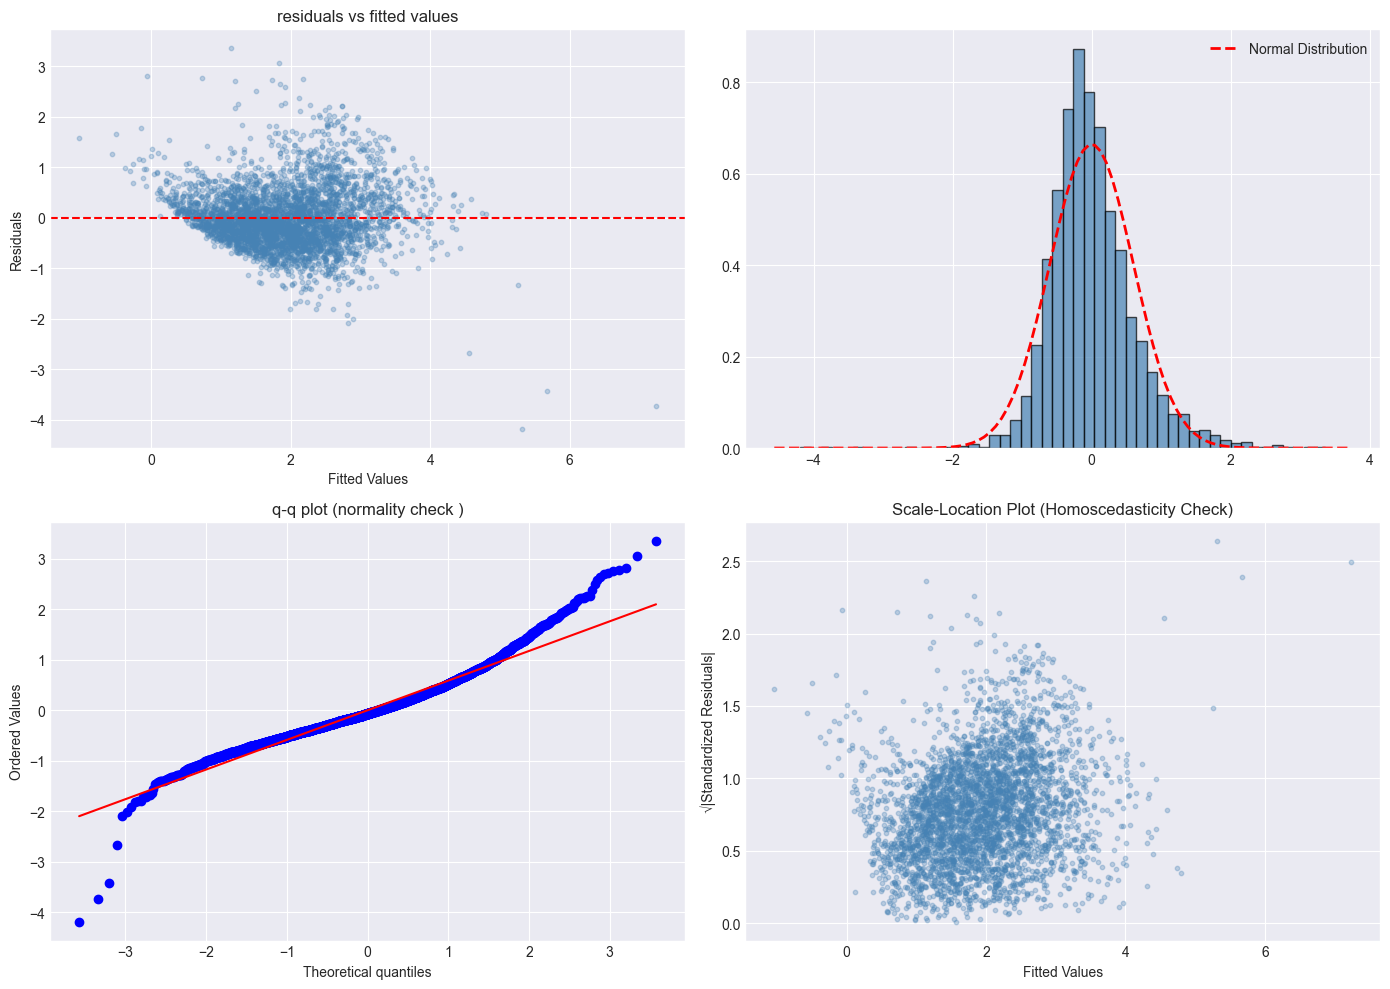

In [45]:
#calculate residual
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

fig, axes = plt.subplots(2,2, figsize=(14,10))

# 1. residual vs fitted
axes[0,0].scatter(y_test_pred, residuals_test, alpha=0.3, s=10, c='steelblue')
axes[0,0].axhline(y=0, color='r', linestyle='--')
axes[0,0].set_xlabel('Fitted Values')
axes[0,0].set_ylabel('Residuals')
axes[0,0].set_title('residuals vs fitted values')

#2. redisual distribution
axes[0,1].hist(residuals_test, bins=50, color='steelblue', edgecolor='black', alpha=0.7, density=True)
xmin,xmax = axes[0,1].get_xlim()
x = np.linspace(xmin,xmax,100)
p = stats.norm.pdf(x, residuals_test.mean(), residuals_test.std())
axes[0,1].plot(x, p, 'r--', linewidth=2, label='Normal Distribution')
axes[0,1].legend()

# Q-Q plot
stats.probplot(residuals_test, dist='norm', plot=axes[1,0])
axes[1,0].set_title('q-q plot (normality check )')

#4 scale - location plot
standardized_residual = residuals_test / residuals_test.std()
axes[1,1].scatter(y_test_pred, np.sqrt(np.abs(standardized_residual)), alpha=0.3, s=10, c='steelblue')
axes[1, 1].set_xlabel('Fitted Values')
axes[1, 1].set_ylabel('√|Standardized Residuals|')
axes[1, 1].set_title('Scale-Location Plot (Homoscedasticity Check)')

plt.tight_layout()
plt.show()

In [46]:
# statistical test
print("Statistical Tests for Residuals:")
print("-" * 50)

#shapire -wilk test for normality ( sample )
sample_residuals = np.random.choice(residuals_test, size=min(5000, len(residuals_test)), replace=False)
shapiro_stat, shapiro_p = stats.shapiro(sample_residuals)
print(f"\n Shapiro-Wilk Test ( Normality): ")
print(f"    Statistic : {shapiro_stat:.6f}")
print(f"    p-value : {shapiro_p:.6f}")
print(f"    Result : {'Normal' if shapiro_p > 500 else 'Not Normal'} (α=0.05)")

# durbi-warson test for autocorrelation
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residuals_test)
print(f"\n Drubin-Watson test ( Auto Correlation): ")
print(f"    Statistic : {dw_stat:.4f}")
print(f"    Interpretation: {'No autocorrelation' if 1.5 < dw_stat < 2.5 else 'Possible Autocorrelation'}")

Statistical Tests for Residuals:
--------------------------------------------------

 Shapiro-Wilk Test ( Normality): 
    Statistic : 0.956112
    p-value : 0.000000
    Result : Not Normal (α=0.05)

 Drubin-Watson test ( Auto Correlation): 
    Statistic : 1.9558
    Interpretation: No autocorrelation


## 10.  Feature Importance & Interpretation

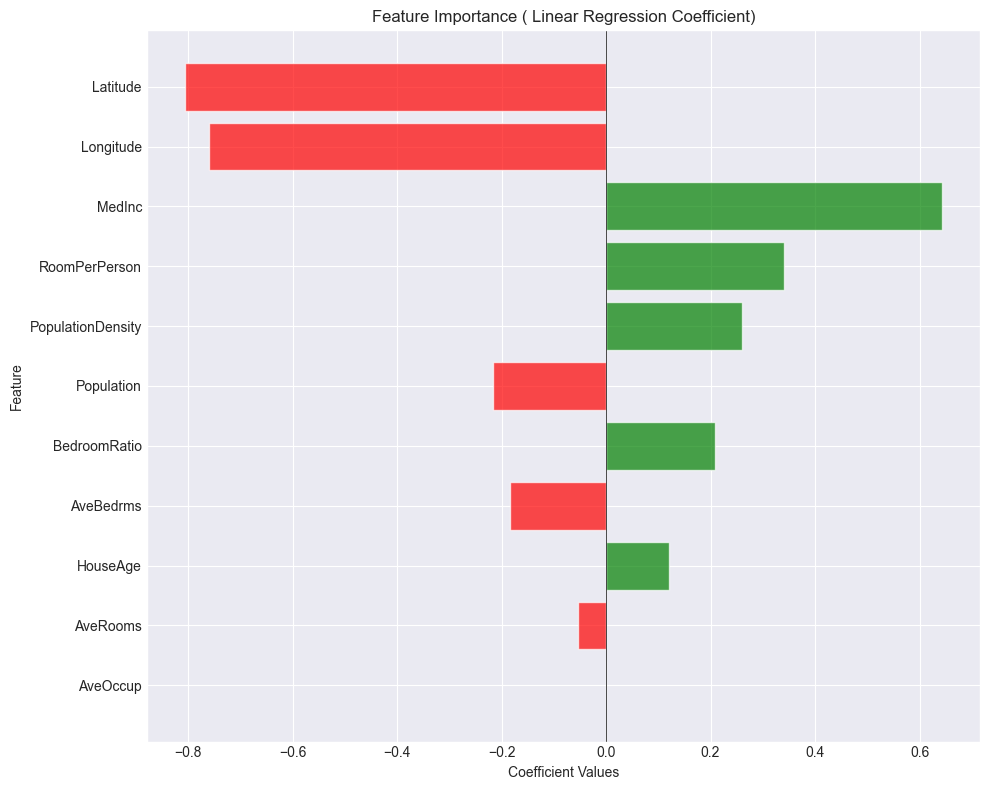

Feature Importance Ranking
Latitude                     -0.8065 ↓
Longitude                    -0.7605 ↓
MedInc                        0.6432 ↑
RoomPerPerson                 0.3409 ↑
PopulationDensity             0.2600 ↑
Population                   -0.2157 ↓
BedroomRatio                  0.2092 ↑
AveBedrms                    -0.1833 ↓
HouseAge                      0.1206 ↑
AveRooms                     -0.0536 ↓
AveOccup                      0.0007 ↑


In [49]:
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': model_sklearn.coef_,
    'Abs_Coefficient': np.abs(model_sklearn.coef_)
}).sort_values('Abs_Coefficient', ascending=True)

plt.figure(figsize=(10,8))
colors = ['green' if c > 0 else 'red' for c in importance_df['Coefficient']]
plt.barh(importance_df['Feature'], importance_df['Coefficient'], color=colors, alpha=0.7)
plt.xlabel('Coefficient Values')
plt.ylabel('Feature')
plt.title('Feature Importance ( Linear Regression Coefficient)')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

print("Feature Importance Ranking")
print('=' * 60)
for _ , row in importance_df.sort_values('Abs_Coefficient', ascending=False).iterrows():
    direction = "↑" if row['Coefficient'] > 0 else "↓"
    print(f"{row['Feature']:<25} {row['Coefficient']:>10.4f} {direction}")

In [54]:
# detailded ols summary using statsmodel
X_train_sm = sm.add_constant(X_train_scaled)
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     2411.
Date:                Wed, 10 Dec 2025   Prob (F-statistic):               0.00
Time:                        00:09:04   Log-Likelihood:                -14037.
No. Observations:               15718   AIC:                         2.810e+04
Df Residuals:                   15706   BIC:                         2.819e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.9205      0.00

# 11 model imporvment techniques

## 11.1 ridge regression ( L2 Regularization )

In [67]:
# Ridge Regression
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
ridge_results = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    train_r2 = ridge.score(X_train_scaled, y_train)
    test_r2 = ridge.score(X_test_scaled, y_test)
    ridge_results.append({'alpha': alpha, 'train_r2': train_r2, 'test_r2': test_r2})

ridge_df = pd.DataFrame(ridge_results)
print(" Ridge Regression Results:")
print(ridge_df.to_string(index=False))

# Best Ridge model
best_alpha_ridge = ridge_df.loc[ridge_df['test_r2'].idxmax(), 'alpha']
ridge_best = Ridge(alpha=best_alpha_ridge)
ridge_best.fit(X_train_scaled, y_train)
print(f"\n Best Ridge Alpha: {best_alpha_ridge}")

 Ridge Regression Results:
   alpha  train_r2  test_r2
  0.0010    0.6280   0.6236
  0.0100    0.6280   0.6236
  0.1000    0.6280   0.6236
  1.0000    0.6280   0.6236
 10.0000    0.6280   0.6236
100.0000    0.6273   0.6234

 Best Ridge Alpha: 10.0


## 11.2 lasso regression ( l1 regularization)

In [69]:
# Lasso Regression
lasso_results = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    train_r2 = lasso.score(X_train_scaled, y_train)
    test_r2 = lasso.score(X_test_scaled, y_test)
    n_features = np.sum(lasso.coef_ != 0)
    lasso_results.append({'alpha': alpha, 'train_r2': train_r2, 'test_r2': test_r2, 'features': n_features})

lasso_df = pd.DataFrame(lasso_results)
print(" Lasso Regression Results:")
print(lasso_df.to_string(index=False))

# Best Lasso model
best_alpha_lasso = lasso_df.loc[lasso_df['test_r2'].idxmax(), 'alpha']
lasso_best = Lasso(alpha=best_alpha_lasso, max_iter=10000)
lasso_best.fit(X_train_scaled, y_train)
print(f"\n Best Lasso Alpha: {best_alpha_lasso}")

 Lasso Regression Results:
   alpha  train_r2  test_r2  features
  0.0010    0.6279   0.6238        11
  0.0100    0.6208   0.6190        11
  0.1000    0.4389   0.4300         4
  1.0000    0.0000  -0.0000         0
 10.0000    0.0000  -0.0000         0
100.0000    0.0000  -0.0000         0

 Best Lasso Alpha: 0.001
